In [3]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

    
image_dir_path = "0923 rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = "0923 rock_scissor_paper/train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

image_dir_path = "0923 rock_scissor_paper/train/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [4]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "0923 rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


바위 :  1


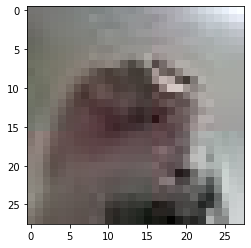

In [62]:
import matplotlib.pyplot as plt
plt.imshow(x_train[122])
print('바위 : ', y_train[122])

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                123936    
_________________________________________________________________
dense_7 (Dense)              (

바위 :  1


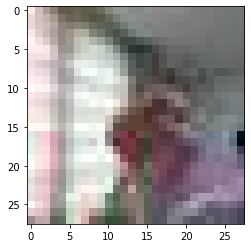

In [63]:
plt.imshow(x_test[122])
print('바위 : ', y_test[122])

In [54]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40)

Epoch 1/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0968 - accuracy: 0.9667
Epoch 2/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9967
Epoch 3/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 5/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 6/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 8/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 11/40
10/10 [

In [55]:
image_dir_path2 = "0923 rock_scissor_paper/Jangho_test/scissor"
resize_images(image_dir_path2)

print("가위 이미지 resize 완료!")

image_dir_path2 = "0923 rock_scissor_paper/Jangho_test/paper"
resize_images(image_dir_path2)

print("보 이미지 resize 완료!")

image_dir_path2 = "0923 rock_scissor_paper/Jangho_test/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

print("이미지 resize 완료!")

import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "0923 rock_scissor_paper/Jangho_test"
(x_test, y_test)=load_data(image_dir_path)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
이미지 resize 완료!
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [56]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.7480 - accuracy: 0.7700
test_loss: 0.748000979423523 
test_accuracy: 0.7699999809265137


In [59]:
epochs=100

batch_size=64

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, shuffle=True)

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 4.8518e-04 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 0.8900
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.9967 - val_loss: 0.8218 - val_accuracy: 0.7700
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2387 - val_accuracy: 0.9067
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4324 - val_accuracy: 0.8400
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 6.7190e-04 - accuracy: 1.0000 - val_loss: 1.0517 - val_accuracy: 0.7200
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0823 - val_accuracy: 0.7133
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 7.0106e-04 - accuracy: 1.0000 - val_loss: 0.9746 - val_accuracy: 0.7167
E

10/10 [==============================] - 0s 7ms/step - loss: 1.2094e-04 - accuracy: 1.0000 - val_loss: 1.1129 - val_accuracy: 0.7333
Epoch 58/100
10/10 [==============================] - 0s 7ms/step - loss: 2.2845e-04 - accuracy: 1.0000 - val_loss: 1.3073 - val_accuracy: 0.7067
Epoch 59/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7955 - val_accuracy: 0.7900
Epoch 60/100
10/10 [==============================] - 0s 11ms/step - loss: 2.5547e-04 - accuracy: 1.0000 - val_loss: 0.4476 - val_accuracy: 0.8600
Epoch 61/100
10/10 [==============================] - 0s 13ms/step - loss: 3.6332e-04 - accuracy: 1.0000 - val_loss: 0.6492 - val_accuracy: 0.8133
Epoch 62/100
10/10 [==============================] - 0s 9ms/step - loss: 2.6386e-04 - accuracy: 1.0000 - val_loss: 1.1216 - val_accuracy: 0.7233
Epoch 63/100
10/10 [==============================] - 0s 7ms/step - loss: 6.3348e-04 - accuracy: 1.0000 - val_loss: 1.2693 - val_accuracy: 

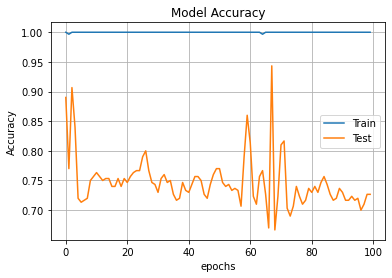

In [60]:
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.legend(['Train','Test'], loc='right')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.grid()  

             
plt_show_acc(history)  
plt.show()

predictions = model.predict(x_test)